In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing

from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from nltk import bigrams
from nltk import trigrams  
import pandas as pd

import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


import sklearn.metrics as metrics

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv(r'C:\Madhan\Analytics\Machine_Learning_project_work\Great_Lakes_AIML\Capstone\src_Data_auxilliary-models_Header_Text_Data_2019-02-26_12-38-04.csv')

In [3]:
df.head()

,index,Item#,Original_Folder,HTML_File_Name,Sequence#,Line_of_Text,Is_Header
0,0,0,Madhan Files,Delhi-CC_361_2018-2018-04-17.html,0,IN THE STATE COMMISSION _COLON_ DELHI,1
1,1,1,Madhan Files,Delhi-CC_361_2018-2018-04-17.html,1,(Constituted under Section _NUM_ of the Consum...,1
2,2,2,Madhan Files,Delhi-CC_361_2018-2018-04-17.html,2,Date of Arguments _COLON_ _NUM__DOT__NUM__DOT_...,1
3,3,3,Madhan Files,Delhi-CC_361_2018-2018-04-17.html,3,Date of Decision _COLON_ _NUM__DOT__NUM__DOT__...,1
4,4,4,Madhan Files,Delhi-CC_361_2018-2018-04-17.html,4,COMPLAINT NO_DOT__NUM__FSLASH__NUM_,1


In [4]:
df.Is_Header.value_counts()

0    32622
1    27458
Name: Is_Header, dtype: int64

In [5]:

import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

In [6]:
df['state'] = df.HTML_File_Name.str[0:5]

In [7]:
dfc = df.state.value_counts()

In [11]:
crstab = pd.crosstab(df.state,df.Is_Header)

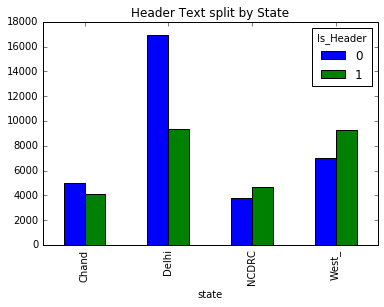

In [15]:
crstab.plot(kind='bar',title='Header Text split by State')

In [57]:
dfc

Delhi    26317
West_    16275
Chand     9078
NCDRC     8410
Name: state, dtype: int64

## Encoding State column

In [58]:
df['state_enc'] = df["state"].values
print("BEFORE ENCODING : {}".format(df.state_enc[0:10]))

print("")

le = preprocessing.LabelEncoder()
le.fit(df.state)

print("ENCODED CLASSES : {}".format(le.classes_))
print("")

df['state_enc'] = le.transform(df.state_enc)

print(df.state_enc.value_counts())
print(df.state.value_counts())

BEFORE ENCODING : 0    Delhi
1    Delhi
2    Delhi
3    Delhi
4    Delhi
5    Delhi
6    Delhi
7    Delhi
8    Delhi
9    Delhi
Name: state_enc, dtype: object

ENCODED CLASSES : ['Chand' 'Delhi' 'NCDRC' 'West_']

1    26317
3    16275
0     9078
2     8410
Name: state_enc, dtype: int64
Delhi    26317
West_    16275
Chand     9078
NCDRC     8410
Name: state, dtype: int64


#### 0: Chandigarh, 1: Delhi, 2: NCRDC, 3: WestBengal

In [17]:
X = df.Line_of_Text

In [18]:
y = df.Is_Header

In [61]:
X_train_txt, X_test_txt, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [62]:
X_train_txt.shape

(48064,)

In [63]:
X_test_txt.shape

(12016,)

In [64]:
y_train.shape

(48064,)

In [65]:
y_test.shape

(12016,)

In [66]:
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,3),lowercase=True,min_df=10)
X_dtm_train = tfidf_vec.fit_transform((X_train_txt))
X_dtm_train.shape

(48064, 17436)

In [67]:
tfidf_vec.vocabulary_

{'new': 11363,
 'delhi_dash__num__dot_': 6898,
 'new delhi_dash__num__dot_': 11376,
 '_num__dot_': 1988,
 '_comma_': 22,
 'complaint': 5535,
 'barred': 3973,
 'limitation_dot_': 10433,
 'counsel': 6281,
 'op': 11869,
 'expressed': 8038,
 '_num__dot_ _comma_': 1989,
 '_comma_ complaint': 433,
 'complaint barred': 5550,
 'barred limitation_dot_': 3975,
 'counsel op': 6302,
 'complaint barred limitation_dot_': 5551,
 '_num__fslash__num__fslash__num_': 2467,
 'date': 6487,
 'institution': 9691,
 'date institution': 6544,
 'filing': 8310,
 '_num__dot__num__dot__num_': 2195,
 'date filing': 6527,
 'filing _num__dot__num__dot__num_': 8314,
 'date filing _num__dot__num__dot__num_': 6529,
 'bose': 4183,
 'garden': 8745,
 'howrah': 9366,
 '_dash__num_': 1517,
 'garden _comma_': 8746,
 '_comma_ howrah': 724,
 '_dash__num_ _num__dot_': 1521,
 'parties': 12511,
 'filed': 8254,
 'written': 17373,
 'arguments_dot_': 3698,
 'parties filed': 12551,
 'filed written': 8298,
 'written arguments_dot_': 173

In [68]:
X_dtm_test = tfidf_vec.transform(X_test_txt)
X_dtm_test.shape

(12016, 17436)

In [69]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [70]:
svcclassifier = SVC(random_state=0,kernel='linear')
svcclassifier.fit(X_dtm_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
y_pred_svm = svcclassifier.predict(X_dtm_test)

In [72]:
## Logistic Regression

In [73]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_dtm_train,y_train)
y_pred_class_logreg = logreg.predict(X_dtm_test)

In [74]:
## Naive Bayes

In [75]:
nb = MultinomialNB()
nb.fit(X_dtm_train,y_train)
y_pred_class_nb = nb.predict(X_dtm_test)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_dtm_train,y_train)
y_pred_class_knn = knn.predict(X_dtm_test)

In [77]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=100,class_weight={0:.5,1:.5}, min_samples_leaf=15)
classifier.fit(X_dtm_train,y_train)
y_pred_tree = classifier.predict(X_dtm_test)

In [163]:
from sklearn.ensemble import RandomForestClassifier
rand_classifer = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rand_classifer.fit(X_dtm_train,y_train)
y_pred_randforest = rand_classifer.predict(X_dtm_test)

In [164]:
print("SVM ACCURACY:",metrics.accuracy_score(y_test,y_pred_svm))
print('SVM CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_svm))
print("===> **SVM F1 SCORE",metrics.f1_score(y_test, y_pred_svm))
print("===> **SVM Recall SCORE",metrics.recall_score(y_test, y_pred_svm))
print("===> **SVM Precision SCORE",metrics.precision_score(y_test, y_pred_svm))
print("===> **SVM ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_svm))
print("##################################################################################################")
print("LogisticReg ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_logreg))
print('LogisticReg CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_logreg))
print("===> **LogisticReg F1 SCORE",metrics.f1_score(y_test, y_pred_class_logreg))
print("===> **LogisticReg Recall SCORE",metrics.recall_score(y_test, y_pred_class_logreg))
print("===> **LogisticReg Precision SCORE",metrics.precision_score(y_test, y_pred_class_logreg))
print("===> **LogisticReg ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_logreg))
print("##################################################################################################")
print("NaiveBayes ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_nb))
print('NaiveBayes CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_nb))
print("===> **NaiveBayes F1 SCORE",metrics.f1_score(y_test, y_pred_class_nb))
print("===> **NaiveBayes Recall SCORE",metrics.recall_score(y_test, y_pred_class_nb))
print("===> **NaiveBayes Precision SCORE",metrics.precision_score(y_test, y_pred_class_nb))
print("===> **NaiveBayes ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_nb))
print("##################################################################################################")
print("KNN ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_knn))
print('KNN CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_knn))
print("===> **KNN F1 SCORE",metrics.f1_score(y_test, y_pred_class_knn))
print("===> **KNN Recall SCORE",metrics.recall_score(y_test, y_pred_class_knn))
print("===> **KNN Precision SCORE",metrics.precision_score(y_test, y_pred_class_knn))
print("===> **KNN ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_knn))
print("##################################################################################################")
print("Dtree ACCURACY:",metrics.accuracy_score(y_test,y_pred_tree))
print('Dtree CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_tree))
print("===> **Dtree F1 SCORE",metrics.f1_score(y_test, y_pred_tree))
print("===> **Dtree Recall SCORE",metrics.recall_score(y_test, y_pred_tree))
print("===> **Dtree Precision SCORE",metrics.precision_score(y_test, y_pred_tree))
print("===> **Dtree ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_tree))
print("##################################################################################################")
print("RandForest ACCURACY:",metrics.accuracy_score(y_test,y_pred_randforest))
print('RandForest CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_randforest))
print("===> **RandForest F1 SCORE",metrics.f1_score(y_test, y_pred_randforest))
print("===> **RandForest Recall SCORE",metrics.recall_score(y_test, y_pred_randforest))
print("===> **RandForest Precision SCORE",metrics.precision_score(y_test, y_pred_randforest))
print("===> **RandForest ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_randforest))

SVM ACCURACY: 0.9700399467376831
SVM CLASSIFIER CONFUSTION MATRIX: col_0         0     1
Is_Header            
0          6371   189
1           171  5285
===> **SVM F1 SCORE 0.9670631290027447
===> **SVM Recall SCORE 0.968658357771261
===> **SVM Precision SCORE 0.9654731457800512
===> **SVM ROC_AUC SCORE 0.9699236910807525
##################################################################################################
LogisticReg ACCURACY: 0.9698735019973369
LogisticReg CLASSIFIER CONFUSTION MATRIX: col_0         0     1
Is_Header            
0          6363   197
1           165  5291
===> **LogisticReg F1 SCORE 0.9669225146198831
===> **LogisticReg Recall SCORE 0.969758064516129
===> **LogisticReg Precision SCORE 0.9641034985422741
===> **LogisticReg ROC_AUC SCORE 0.9698637883556255
##################################################################################################
NaiveBayes ACCURACY: 0.9506491344873502
NaiveBayes CLASSIFIER CONFUSTION MATRIX: col_0         0     1

In [ ]:
models = [
    RandomForestClassifier(n_estimators=200, random_state=0),
    LinearSVC(),
    LogisticRegression(random_state=0),
    MultinomialNB(),
    DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=100,class_weight={0:.5,1:.5}, min_samples_leaf=15),
    KNeighborsClassifier(n_neighbors=10)
    
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
re = []
pre = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_dtm_train, y_train, scoring='accuracy', cv=CV)
    recalls = cross_val_score(model, X_dtm_train, y_train, scoring='recall', cv=CV,)
    precisions = cross_val_score(model, X_dtm_train, y_train, scoring='precision', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    for rec, recall in enumerate(recalls):
        re.append((model_name,rec,recall))
    for prec, preci in enumerate(precisions):
        pre.append((model_name,prec,preci))
    print("Completed:",model)
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
cv_df_precision = pd.DataFrame(pre, columns=['model_name', 'fold_idx', 'precision_score'])

In [ ]:
cv_df_recall = pd.DataFrame(re, columns=['model_name', 'fold_idx', 'recall_score'])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x='model_name', y='accuracy', data=cv_df).set_title("Accuracy comparison - Cross Validation")
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x='model_name', y='precision_score', data=cv_df_precision).set_title("Precision comparison - Cross Validation")
sns.stripplot(x='model_name', y='precision_score', data=cv_df_precision, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x='model_name', y='recall_score', data=cv_df_recall).set_title("Recall scores - Cross Validation")
sns.stripplot(x='model_name', y='recall_score', data=cv_df_recall, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

### After Stopwords removal & Lemmatizing

In [96]:
wordified = ['_NUM_', 'DOTS','DOT','SQUOTE','COMMA','SEMICOLON','COLON','DASH','BSLASH','FSLASH']

In [26]:
corpus = []
words = []
for i in range(len(X)):
    #sent = X[i].splitlines()
    #sent = [s for s in sent if not re.search(r'[0-9]',s)]
    #sent = [s for s in sent if len(s)>0]
    #sentences = re.sub('[^a-zA-Z]',' ',str(sent))
    text = X[i]
    #print(text[0:10])
    #sentences = sentences.split()
    #print(sentences)
    #lm = WordNetLemmatizer()
    #sentences = [lm.lemmatize(word) for word in sentences if not word in set(stopwords.words('english')) and len(word)>2]
    sentences = text.replace('NUM','')
    sentences = sentences.replace('DOTS','')
    sentences = sentences.replace('DOT','')
    sentences = sentences.replace('SQUOTE','')
    sentences = sentences.replace('QUOTE','')
    sentences = sentences.replace('COMMA','')
    sentences = sentences.replace('SEMICOLON','')
    sentences = sentences.replace('COLON','')
    sentences = sentences.replace('DASH','')
    sentences = sentences.replace('BSLASH','')
    sentences = sentences.replace('FSLASH','')
    sentences = sentences.replace('_','')
    sentences = sentences.strip()
    #sentences = [sentences.replace('_DOT_','')]
    #words+= sent
    #sentences = ' '.join(sent)
    corpus.append(sentences)
#print(coprus)

In [27]:
corpus[1]

'(Constituted under Section  of the Consumer Protection Act   )'

In [28]:
corpus[10]

'Haryana Complainant'

In [30]:
len(corpus)

60080

In [31]:
df = pd.DataFrame(corpus,columns=['headertext'])

In [58]:
df.to_csv('before_wordified.csv')

In [32]:
X= df.headertext

In [33]:
X_train_txt, X_test_txt, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [34]:
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,3),lowercase=True,min_df=10)
X_dtm_train = tfidf_vec.fit_transform((X_train_txt))
X_dtm_train.shape

(48064, 13908)

In [35]:
tfidf_vec.vocabulary_

{'new': 8126,
 'delhi': 4097,
 'new delhi': 8129,
 'complaint': 2809,
 'barred': 1331,
 'limitation': 7318,
 'counsel': 3525,
 'op': 8472,
 'expressed': 5141,
 'complaint barred': 2819,
 'barred limitation': 1332,
 'counsel op': 3544,
 'complaint barred limitation': 2820,
 'date': 3710,
 'institution': 6637,
 'date institution': 3746,
 'filing': 5391,
 'date filing': 3736,
 'bose': 1525,
 'garden': 5804,
 'howrah': 6353,
 'parties': 9103,
 'filed': 5341,
 'written': 13854,
 'arguments': 1089,
 'parties filed': 9144,
 'filed written': 5380,
 'written arguments': 13855,
 'parties filed written': 9147,
 'filed written arguments': 5381,
 'complainant': 2496,
 'registered': 10868,
 'office': 8429,
 'situated': 12303,
 'commission': 2225,
 'got': 5937,
 'jurisdiction': 6840,
 'counsel complainant': 3528,
 'registered office': 10880,
 'office op': 8441,
 'commission got': 2269,
 'kolkata': 6985,
 'versus': 13482,
 'smt': 12339,
 'rastogi': 10580,
 'dated': 3787,
 'said': 11552,
 'illegal': 64

In [36]:
X_dtm_test = tfidf_vec.transform(X_test_txt)
X_dtm_test.shape

(12016, 13908)

In [37]:

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [38]:
svcclassifier = SVC(random_state=0,kernel='linear')
svcclassifier.fit(X_dtm_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
y_pred_svm = svcclassifier.predict(X_dtm_test)

In [40]:
## Logistic Regression

In [41]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_dtm_train,y_train)
y_pred_class_logreg = logreg.predict(X_dtm_test)

In [42]:
nb = MultinomialNB()
nb.fit(X_dtm_train,y_train)
y_pred_class_nb = nb.predict(X_dtm_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_dtm_train,y_train)
y_pred_class_knn = knn.predict(X_dtm_test)

In [44]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=100,class_weight={0:.7,1:.3}, min_samples_leaf=15)
classifier.fit(X_dtm_train,y_train)
y_pred_tree = classifier.predict(X_dtm_test)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rand_classifer = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rand_classifer.fit(X_dtm_train,y_train)
y_pred_randforest = rand_classifer.predict(X_dtm_test)

In [46]:
X_train_tokens = tfidf_vec.get_feature_names()

In [47]:
coef = rand_classifer.feature_importances_

In [48]:
top_positive_coefficients = np.argsort(coef)[-20:]
top_negative_coefficients = np.argsort(coef)[:20]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

In [49]:
coef

array([2.74782909e-06, 1.18754999e-05, 4.92515078e-07, ...,
       1.88398020e-05, 5.96726002e-06, 0.00000000e+00])

In [50]:
top_coefficients

array([13907,  6064,  6063,  6062,  6061,  6060,  6059,  6058,  6057,
        6056,  6055,  6054, 11388,  6051,  6050,  6049, 11389,  6046,
        6044,  6042,  4097, 11552,  8750, 10060,  9103,  5467,  6985,
        2417,  9718,  2688,  8978,  7675,  1776,  7881,  2809, 13482,
         490, 11354,  8472,  2496], dtype=int64)

In [51]:
topc = []
for top in top_positive_coefficients:
    topc.append(X_train_tokens[top])

In [53]:
#pd.Series(top_positive_coefficients, index=topc

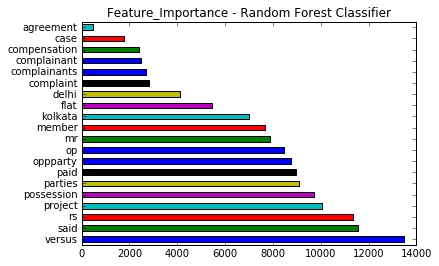

In [54]:
(pd.Series(top_positive_coefficients, index=topc)
   .nlargest(20)
   .plot(kind='barh',title='Feature_Importance - Random Forest Classifier'))

In [1]:
# create plot
#plt.figure(figsize=(12, 5))
#colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
#plt.bar(np.arange(2 * 20), coef[top_positive_coefficients])
#feature_names = np.array(X_train_tokens)
#plt.xticks(np.arange(1, 1 + 2 * 20), feature_names[top_positive_coefficients], rotation=60, ha='right')
#plt.title('Visualising Top Features in Linear SVM')
#plt.show()


In [57]:
print("SVM ACCURACY:",metrics.accuracy_score(y_test,y_pred_svm))
print('SVM CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_svm))
print("===> **SVM F1 SCORE",metrics.f1_score(y_test, y_pred_svm))
print("===> **SVM Recall SCORE",metrics.recall_score(y_test, y_pred_svm))
print("===> **SVM Precision SCORE",metrics.precision_score(y_test, y_pred_svm))
print("===> **SVM ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_svm))
print("##################################################################################################")
print("LogisticReg ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_logreg))
print('LogisticReg CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_logreg))
print("===> **LogisticReg F1 SCORE",metrics.f1_score(y_test, y_pred_class_logreg))
print("===> **LogisticReg Recall SCORE",metrics.recall_score(y_test, y_pred_class_logreg))
print("===> **LogisticReg Precision SCORE",metrics.precision_score(y_test, y_pred_class_logreg))
print("===> **LogisticReg ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_logreg))
print("##################################################################################################")
print("NaiveBayes ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_nb))
print('NaiveBayes CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_nb))
print("===> **NaiveBayes F1 SCORE",metrics.f1_score(y_test, y_pred_class_nb))
print("===> **NaiveBayes Recall SCORE",metrics.recall_score(y_test, y_pred_class_nb))
print("===> **NaiveBayes Precision SCORE",metrics.precision_score(y_test, y_pred_class_nb))
print("===> **NaiveBayes ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_nb))
print("##################################################################################################")
print("KNN ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_knn))
print('KNN CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_knn))
print("===> **KNN F1 SCORE",metrics.f1_score(y_test, y_pred_class_knn))
print("===> **KNN Recall SCORE",metrics.recall_score(y_test, y_pred_class_knn))
print("===> **KNN Precision SCORE",metrics.precision_score(y_test, y_pred_class_knn))
print("===> **KNN ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_knn))
print("##################################################################################################")
print("Dtree ACCURACY:",metrics.accuracy_score(y_test,y_pred_tree))
print('Dtree CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_tree))
print("===> **Dtree F1 SCORE",metrics.f1_score(y_test, y_pred_tree))
print("===> **Dtree Recall SCORE",metrics.recall_score(y_test, y_pred_tree))
print("===> **Dtree Precision SCORE",metrics.precision_score(y_test, y_pred_tree))
print("===> **Dtree ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_tree))
print("##################################################################################################")
print("RandForest ACCURACY:",metrics.accuracy_score(y_test,y_pred_randforest))
print('RandForest CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_randforest))
print("===> **RandForest F1 SCORE",metrics.f1_score(y_test, y_pred_randforest))
print("===> **RandForest Recall SCORE",metrics.recall_score(y_test, y_pred_randforest))
print("===> **RandForest Precision SCORE",metrics.precision_score(y_test, y_pred_randforest))
print("===> **RandForest ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_randforest))

SVM ACCURACY: 0.9462383488681758
SVM CLASSIFIER CONFUSTION MATRIX: col_0         0     1
Is_Header            
0          5979   581
1            65  5391
===> **SVM F1 SCORE 0.9434721736086804
===> **SVM Recall SCORE 0.9880865102639296
===> **SVM Precision SCORE 0.9027126590756865
===> **SVM ROC_AUC SCORE 0.9497597185465988
##################################################################################################
LogisticReg ACCURACY: 0.9447403462050599
LogisticReg CLASSIFIER CONFUSTION MATRIX: col_0         0     1
Is_Header            
0          5998   562
1           102  5354
===> **LogisticReg F1 SCORE 0.9416109743228984
===> **LogisticReg Recall SCORE 0.9813049853372434
===> **LogisticReg Precision SCORE 0.9050033806626099
===> **LogisticReg ROC_AUC SCORE 0.9478171268149632
##################################################################################################
NaiveBayes ACCURACY: 0.9274300932090546
NaiveBayes CLASSIFIER CONFUSTION MATRIX: col_0         0    

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.3, max_depth=10)
gbcl = gbcl.fit(X_dtm_train, y_train)

In [108]:
y_pred_gbcl = gbcl.predict(X_dtm_test)

In [109]:
print("GBC: ACCURACY:",metrics.accuracy_score(y_test,y_pred_gbcl))
print('GBC CLASSIFIER CONFUSTION MATRIX:%\n',pd.crosstab(y_test,y_pred_gbcl))
print("===> **GBC F1 SCORE",metrics.f1_score(y_test, y_pred_gbcl))
print("===> **GBC Recall SCORE",metrics.recall_score(y_test, y_pred_gbcl))
print("===> **GBC Precision SCORE",metrics.precision_score(y_test, y_pred_gbcl))
print("===> **GBC ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_gbcl))

GBC: ACCURACY: 0.9565579227696405
GBC CLASSIFIER CONFUSTION MATRIX:%
 col_0         0     1
Is_Header            
0          6358   202
1           320  5136
===> **GBC F1 SCORE 0.9516397998888271
===> **GBC Recall SCORE 0.9413489736070382
===> **GBC Precision SCORE 0.9621581116523042
===> **GBC ROC_AUC SCORE 0.9552781453401045


In [ ]:
import pickle


In [ ]:
svcmodel2 = 'logregmodel2.sav'

In [ ]:
pickle.dump(svcclassifier,open(svcmodel2,'wb'))

In [ ]:
vectorizer2 = 'vectorizer2.pk'

In [ ]:
pickle.dump(tfidf_vec,open(vectorizer2,'wb'))

In [ ]:
from sklearn.ensemble import VotingClassifier


In [ ]:
lrcl = LogisticRegression(random_state=1,C=1e9)
rfcl = RandomForestClassifier(n_estimators=200, random_state=0,criterion='entropy')
svcclassifier = SVC(random_state=0,kernel='linear')
#dtree = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=100)
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.3, max_depth=10)  #the base_estimator can be null. The bagging classifer  will build it's own tree

#enclf = VotingClassifier(estimators = [('lor', lrcl), ('rf', rfcl), ('nb', nbcl), ('bg', bgcl), ('dt', dt_model)], voting = 'hard')

stack = VotingClassifier(estimators = [('logistic', lrcl), ('randomforest', rfcl),('SVC', svcclassifier),('GradientBoosing', gbcl)], voting = 'hard')

In [ ]:
for clf, label in zip([lrcl , rfcl, stack, gbcl, svcclassifier], ['Logistic Regression', 'RandomForest','SVC','GradientBoosing']):
    scores = cross_val_score(clf, X_dtm_train, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

In [ ]:
#tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,3),lowercase=True,min_df=10)
X_dtm = tfidf_vec.fit_transform((X))

In [ ]:
stack.fit(X_dtm,y)

In [ ]:
print("Stack: ACCURACY:",metrics.accuracy_score(y_test,y_pred_stack))
print('Stack CLASSIFIER CONFUSTION MATRIX:%\n',pd.crosstab(y_test,y_pred_stack))
print("===> **Stack F1 SCORE",metrics.f1_score(y_test, y_pred_stack))
print("===> **Stack Recall SCORE",metrics.recall_score(y_test, y_pred_stack))
print("===> **Stack Precision SCORE",metrics.precision_score(y_test, y_pred_stack))
print("===> **Stack ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_stack))

In [ ]:
stackmodel2 = 'stackmodel2.sav'

In [ ]:
pickle.dump(stack,open(stackmodel2,'wb'))